In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
#from ema_workbnech.analysis import prim
from sklearn.model_selection import train_test_split
import pandas as pd

ModuleNotFoundError: No module named 'ema_workbnech'

In [29]:
def calculate_precision_test_data(lims, x_test, y_test):

    is_within_limits = True
    
    # Iterate over each row of temp_data
    # Initialize TP, FP, TN, FN counters
    tp = 0
    fp = 0
    tn = 0
    fn = 0


    # Assuming x_test is a 2D NumPy array and y_test is a 1D NumPy array
    for row_index in range(x_test.shape[0]):
        for col_index in range(x_test.shape[1]):
            element = x_test[row_index, col_index]

            # Check if the element is within the limits for the current column
            is_within_limits = (lims.iloc[0, col_index] <= element <= lims.iloc[1, col_index]) and is_within_limits # Calculate column index
            
        if is_within_limits & (y_test[row_index] == 1):
            tp = tp + 1
        if is_within_limits & (y_test[row_index] == 0):
            fp = fp + 1
        if is_within_limits & (y_test[row_index] == 0):
            tn = tn + 1
        if is_within_limits & (y_test[row_index] == 1):
            fn = fn + 1
        is_within_limits = True
            
                
    if (tp == 0):
        return 0
    else:
        return tp/(tp + fp)

In [30]:
def plot_results(pts, res_train, res_test, plt_name):
    plt.plot(pts, res_train, label='train precision', color='blue')

    # Create a line plot for the second data series (y2) in red
    plt.plot(pts, res_test, label='test precision', color='red')

    # Add labels, a title, and a legend
    plt.xlabel('Number of points test set')
    plt.ylabel('Precision')
    plt.title('Precision of Test vs. Train Data')
    plt.legend()
    
    plt.savefig(plt_name)

    # Show the plot
    return plt

In [31]:
def define_train_test_split(data_name, stratify_feature, drop_feature, test_size):
    
    if (data_name) == 'Bryant':
        data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Bryant et al 2010.csv')
        
        
    else:
        if (data_name) == 'Rozenberg':
            data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Rozenberg et al 2014.csv')
    
    #sampeling a subset of the whole data set
    sample_train, sample_test = train_test_split(data, test_size=test_size, stratify=data[stratify_feature])
        
    sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
    sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

    y = sample_train[stratify_feature]
    temp_data = pd.DataFrame(sample_train.drop(columns=drop_feature))
    x = temp_data.values
            
    y_test = sample_test[stratify_feature]
    temp_data = pd.DataFrame(sample_test.drop(columns=drop_feature))
    x_test = temp_data.values
        
    return x, y, x_test, y_test
        
        

In [1]:
#precision with different Dataset sizes Rozenberg2014_SSP1
pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
        
        x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4'], pts[n])    
        
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))     
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1
plt_name = 'Results_emaWorkbench_Varying_Size/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP1.png' 
plot_results(pts, res_train, res_test, plt_name)

NameError: name 'np' is not defined

experiment 8/8

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

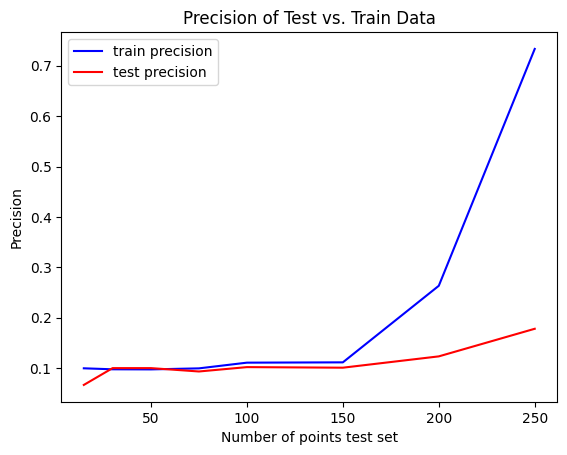

In [33]:
#precision with different Dataset sizes Rozenberg2014_SSP2
pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
        
        x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP2', ['SSP1', 'SSP2', 'SSP3', 'SSP4'], pts[n]) 
            
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1
    
plt_name = 'Results_emaWorkbench_Varying_Size/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP2.png' 
    
plot_results(pts, res_train, res_test, plt_name)

experiment 8/8

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

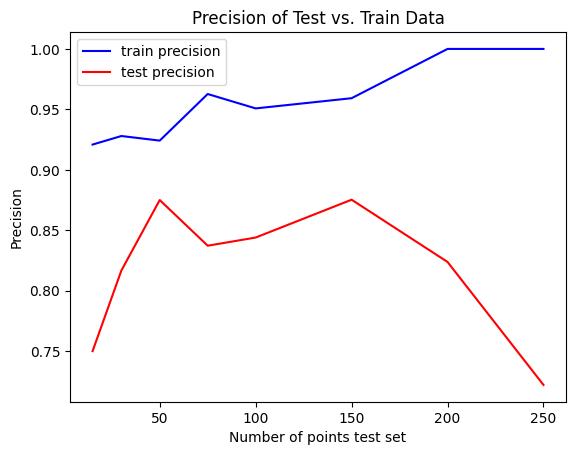

In [34]:
#precision with different Dataset sizes Rozenberg2014_SSP3
pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(10):  # for each dataset size (n rows, m columns) do five experiments and average the results
        x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP3', ['SSP1', 'SSP2', 'SSP3', 'SSP4'], pts[n]) 
            
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1

plt_name = 'Results_emaWorkbench_Varying_Size/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP3.png' 
    
plot_results(pts, res_train, res_test, plt_name)

experiment 8/8

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

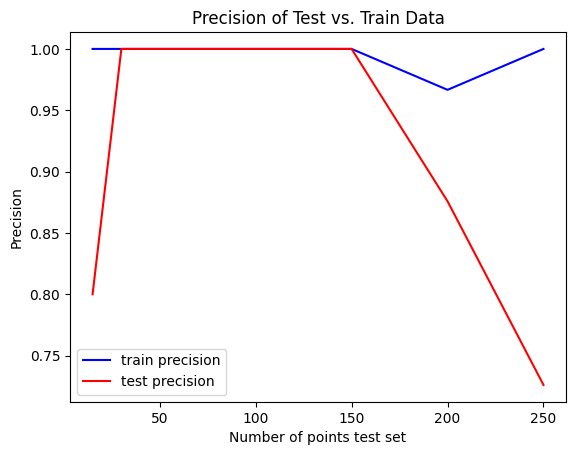

In [37]:
#precision with different Dataset sizes Rozenberg2014_SSP4
pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(5):  # for each dataset size (n rows, m columns) do five experiments and average the results
        x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP4', ['SSP1', 'SSP2', 'SSP3', 'SSP4'], pts[n]) 
            
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1
    
plt_name = 'Results_emaWorkbench_Varying_Size/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP4.png' 
    
plot_results(pts, res_train, res_test, plt_name)

experiment 6/6

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

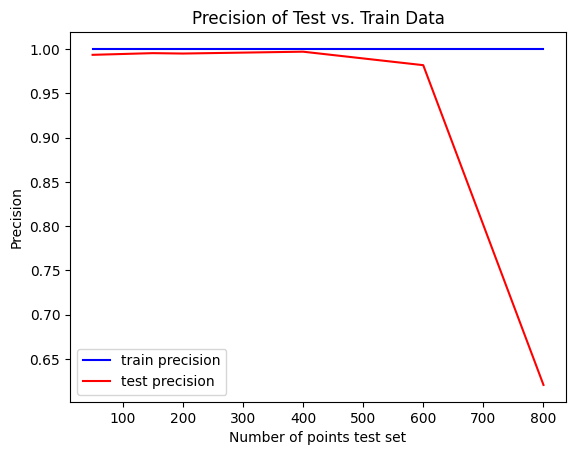

In [38]:
#precision with different Dataset sizes Bryant2010_GreaterThan90
pts = [50, 150, 200, 400, 600, 800]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
        x, y, x_test, y_test = define_train_test_split('Bryant', 'Greater than 90%', ['Less than 10%', 'Greater than 90%'], pts[n]) 
            
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1
    
plt_name = 'Results_emaWorkbench_Varying_Size/' + 'Precision_varied_Size_Bryant2010_Feature_GreaterThan10.png' 
    
plot_results(pts, res_train, res_test, plt_name)

experiment 6/6

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

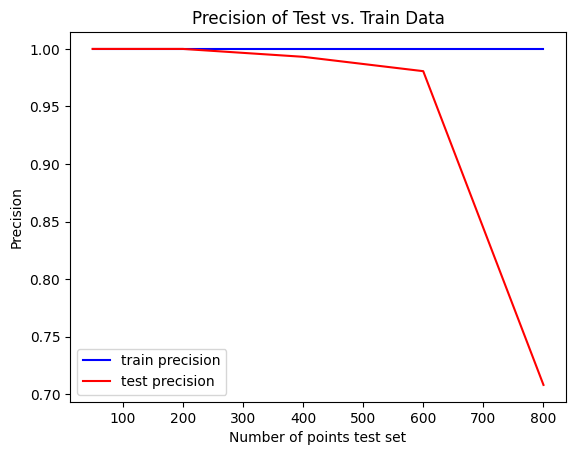

In [39]:
#precision with different Dataset sizes Bryant2010_LessThan10
pts = [50, 150, 200, 400, 600, 800]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
        x, y, x_test, y_test = define_train_test_split('Bryant', 'Less than 10%', ['Less than 10%', 'Greater than 90%'], pts[n]) 
            
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1
    
plt_name = 'Results_emaWorkbench_Varying_Size/' + 'Precision_varied_Size_Bryant2010_Feature_LessThan10.png' 

plot_results(pts, res_train, res_test, plt_name)